In [4]:
import pandas as pd

customers = pd.read_csv('customers.csv')
invoices = pd.read_csv('invoices.csv')

In [5]:
customers.head()

,customer_id,created_at,score
0,1850911,2017-11-09 15:20:25,0
1,1850912,2017-11-09 15:20:25,0
2,1850913,2017-11-09 15:20:25,27
3,1850914,2017-11-09 15:20:25,0
4,1850915,2017-11-09 15:20:25,0


In [6]:
invoices.head()

,invoice_id,customer_id,created_at,due,last_payment_date,paid_status,total,paid,tax,currency,exchange_rate,source_system,description
0,2993491,1856508,2016-09-13 15:23:39,2016-09-09 00:00:00,2016-10-10 00:00:00,PAID,549.0,549.0,0.0,USD,1.0,FTP,company_name Premier Dealer - Larry H Miller F...
1,2993492,1851640,2016-01-18 15:10:52,2016-01-09 00:00:00,2016-01-23 00:00:00,PAID,2000.0,2000.0,0.0,USD,1.0,FTP,company_name Premier Dealer - Pacific Honda
2,2993493,1856509,2016-02-09 22:56:18,2016-02-09 00:00:00,2016-02-27 00:00:00,PAID,1192.0,1192.0,0.0,USD,1.0,FTP,company_name Premier Dealer - Star Motor Cars
3,2993494,1856511,2016-03-14 15:54:10,2016-03-09 00:00:00,2016-03-14 00:00:00,PAID,942.0,942.0,0.0,USD,1.0,FTP,company_name Premier Dealer - Jaguar Monroevil...
4,2993495,1859163,2016-10-10 10:03:07,2016-10-09 00:00:00,2016-10-23 00:00:00,PAID,644.0,644.0,0.0,USD,1.0,FTP,company_name Premier Dealer - Wilde Lexus of S...


In [7]:
print(customers.shape)
print(invoices.shape)

(11728, 3)
(137662, 13)


In [8]:
invoices.describe()

,invoice_id,customer_id,total,paid,tax,exchange_rate
count,1.376620e+05,1.376620e+05,137662.000000,137662.000000,93110.000000,137662.0
mean,3.267899e+06,1.869814e+06,957.767216,860.636768,0.267715,1.0
std,3.849429e+05,7.285500e+04,6915.797241,6226.288940,1.278615,0.0
min,2.993491e+06,1.850911e+06,-132529.450000,-132529.450000,0.000000,1.0
25%,3.027906e+06,1.853421e+06,0.000000,0.000000,0.000000,1.0
50%,3.062322e+06,1.855904e+06,495.000000,395.000000,0.000000,1.0
75%,3.503874e+06,1.858438e+06,1067.680000,999.000000,0.000000,1.0
max,4.162048e+06,2.381782e+06,540099.690000,518461.800000,6.760000,1.0


Firstly, I should delete features which are useless (to my opinion feature with only 1 value for all instances is redundant and also some features were not mentioned in description file):
* exchange_rate
* tax
* currency - - the same value for all rows
* source_system - the same value for all rows

Also, unfortunately binary classifier (which I am going to use for prediction paid status in time:'0' - No, '1' - Yes) can not deal with categorical data type (as description) and we should either thansform it to many binary features ('dummies') or exclude it. 

With date/time columns we also should do some preprocesiing and split it in different new features (year, month, day, hour, minute, second).

In [9]:
invoices = invoices.drop(['description', 'source_system', 'exchange_rate', 'currency', 'tax', 'last_payment_date'], axis = 1)

In [10]:
invoices.head()

,invoice_id,customer_id,created_at,due,paid_status,total,paid
0,2993491,1856508,2016-09-13 15:23:39,2016-09-09 00:00:00,PAID,549.0,549.0
1,2993492,1851640,2016-01-18 15:10:52,2016-01-09 00:00:00,PAID,2000.0,2000.0
2,2993493,1856509,2016-02-09 22:56:18,2016-02-09 00:00:00,PAID,1192.0,1192.0
3,2993494,1856511,2016-03-14 15:54:10,2016-03-09 00:00:00,PAID,942.0,942.0
4,2993495,1859163,2016-10-10 10:03:07,2016-10-09 00:00:00,PAID,644.0,644.0


In [11]:
data_dummies = pd.get_dummies(invoices, columns = ["paid_status"])

In [12]:
data_dummies.head()

,invoice_id,customer_id,created_at,due,total,paid,paid_status_PAID,paid_status_PARTIAL,paid_status_UNPAID
0,2993491,1856508,2016-09-13 15:23:39,2016-09-09 00:00:00,549.0,549.0,1,0,0
1,2993492,1851640,2016-01-18 15:10:52,2016-01-09 00:00:00,2000.0,2000.0,1,0,0
2,2993493,1856509,2016-02-09 22:56:18,2016-02-09 00:00:00,1192.0,1192.0,1,0,0
3,2993494,1856511,2016-03-14 15:54:10,2016-03-09 00:00:00,942.0,942.0,1,0,0
4,2993495,1859163,2016-10-10 10:03:07,2016-10-09 00:00:00,644.0,644.0,1,0,0


In [13]:
data_dummies.dtypes

invoice_id               int64
customer_id              int64
created_at              object
due                     object
total                  float64
paid                   float64
paid_status_PAID         uint8
paid_status_PARTIAL      uint8
paid_status_UNPAID       uint8
dtype: object

In [14]:
data_dummies['created_at'] =  pd.to_datetime(data_dummies['created_at'], format='%Y-%m-%d %H:%M:%S.%f')
data_dummies['due'] =  pd.to_datetime(data_dummies['due'], format='%Y-%m-%d %H:%M:%S.%f')

In [15]:
data_dummies.head()

,invoice_id,customer_id,created_at,due,total,paid,paid_status_PAID,paid_status_PARTIAL,paid_status_UNPAID
0,2993491,1856508,2016-09-13 15:23:39,2016-09-09,549.0,549.0,1,0,0
1,2993492,1851640,2016-01-18 15:10:52,2016-01-09,2000.0,2000.0,1,0,0
2,2993493,1856509,2016-02-09 22:56:18,2016-02-09,1192.0,1192.0,1,0,0
3,2993494,1856511,2016-03-14 15:54:10,2016-03-09,942.0,942.0,1,0,0
4,2993495,1859163,2016-10-10 10:03:07,2016-10-09,644.0,644.0,1,0,0


In [16]:
data_dummies['created_at_year'] = pd.DatetimeIndex(data_dummies['created_at']).year
data_dummies['created_at_month'] = pd.DatetimeIndex(data_dummies['created_at']).month
data_dummies['created_at_day'] = pd.DatetimeIndex(data_dummies['created_at']).day
data_dummies['created_at_hour'] = pd.DatetimeIndex(data_dummies['created_at']).hour
data_dummies['created_at_minute'] = pd.DatetimeIndex(data_dummies['created_at']).minute
data_dummies['created_at_second'] = pd.DatetimeIndex(data_dummies['created_at']).second

In [17]:
data_dummies['due_year'] = pd.DatetimeIndex(data_dummies['due']).year
data_dummies['due_month'] = pd.DatetimeIndex(data_dummies['due']).month
data_dummies['due_day'] = pd.DatetimeIndex(data_dummies['due']).day
data_dummies['due_hour'] = pd.DatetimeIndex(data_dummies['due']).hour
data_dummies['due_minute'] = pd.DatetimeIndex(data_dummies['due']).minute
data_dummies['due_second'] = pd.DatetimeIndex(data_dummies['due']).second

In [18]:
data_dummies.head()

,invoice_id,customer_id,created_at,due,total,paid,paid_status_PAID,paid_status_PARTIAL,paid_status_UNPAID,created_at_year,...,created_at_day,created_at_hour,created_at_minute,created_at_second,due_year,due_month,due_day,due_hour,due_minute,due_second
0,2993491,1856508,2016-09-13 15:23:39,2016-09-09,549.0,549.0,1,0,0,2016,...,13,15,23,39,2016,9,9,0,0,0
1,2993492,1851640,2016-01-18 15:10:52,2016-01-09,2000.0,2000.0,1,0,0,2016,...,18,15,10,52,2016,1,9,0,0,0
2,2993493,1856509,2016-02-09 22:56:18,2016-02-09,1192.0,1192.0,1,0,0,2016,...,9,22,56,18,2016,2,9,0,0,0
3,2993494,1856511,2016-03-14 15:54:10,2016-03-09,942.0,942.0,1,0,0,2016,...,14,15,54,10,2016,3,9,0,0,0
4,2993495,1859163,2016-10-10 10:03:07,2016-10-09,644.0,644.0,1,0,0,2016,...,10,10,3,7,2016,10,9,0,0,0


Now, for prediction which invoice will be paid in time we should discover (create) this feature in the given data: status = 'PAID' and difference in time between 'due' and 'last_payment_data' should be >= 0. I have done some data manipulation in r (as it was easier for me): create new feature, data description. Also I merge two given data sets by customer_id to add customer score for each invoice.

In [19]:
data_dummies.to_csv('invoices_dummies.csv')

In [23]:
data_full = pd.read_csv('invoices_full.csv')

In [24]:
data_full.head()

,customer_id,invoice_id,created_at,due,last_payment_date,total,paid,paid_status_PAID,paid_status_PARTIAL,paid_status_UNPAID,...,due_year,due_month,due_day,due_hour,due_minute,due_second,timeliness,timeafter,customer_created_at,score
0,1850911,3012075,9/13/2016 14:58,9/9/2016,9/13/2016 14:58,0.0,0.0,1,0,0,...,2016,9,9,0,0,0,overdue,399498.0,11/9/2017 15:20,0
1,1850911,3037215,8/7/2016 16:36,8/9/2016,8/7/2016 16:36,0.0,0.0,1,0,0,...,2016,8,9,0,0,0,intime,-113028.0,11/9/2017 15:20,0
2,1850911,3072748,5/15/2016 15:29,5/9/2016,5/15/2016 15:29,0.0,0.0,1,0,0,...,2016,5,9,0,0,0,overdue,574155.0,11/9/2017 15:20,0
3,1850911,3054813,7/14/2016 10:50,7/9/2016,7/14/2016 10:50,0.0,0.0,1,0,0,...,2016,7,9,0,0,0,overdue,471049.0,11/9/2017 15:20,0
4,1850911,3061747,10/10/2016 10:03,10/9/2016,10/10/2016 10:03,0.0,0.0,1,0,0,...,2016,10,9,0,0,0,overdue,122595.0,11/9/2017 15:20,0


In [25]:
data_full.describe()

,customer_id,invoice_id,total,paid,paid_status_PAID,paid_status_PARTIAL,paid_status_UNPAID,created_at_year,created_at_month,created_at_day,...,created_at_minute,created_at_second,due_year,due_month,due_day,due_hour,due_minute,due_second,timeafter,score
count,1.376620e+05,1.376620e+05,137662.000000,137662.000000,137662.000000,137662.000000,137662.000000,137662.000000,137662.000000,137662.000000,...,137662.000000,137662.000000,137662.000000,137662.000000,137662.000000,137662.0,137662.0,137662.0,1.301780e+05,137662.000000
mean,1.869814e+06,3.267899e+06,957.767216,860.636768,0.926407,0.004075,0.069518,2016.206215,5.625677,11.308596,...,37.409554,29.046549,2016.205474,5.630632,9.020085,0.0,0.0,0.0,1.620834e+06,21.124079
std,7.285500e+04,3.849429e+05,6915.797241,6226.288940,0.261109,0.063707,0.254334,0.404588,3.582875,3.485159,...,18.181206,17.836532,0.404103,3.581988,1.901520,0.0,0.0,0.0,2.942934e+06,25.737692
min,1.850911e+06,2.993491e+06,-132529.450000,-132529.450000,0.000000,0.000000,0.000000,2016.000000,1.000000,1.000000,...,0.000000,0.000000,2016.000000,1.000000,1.000000,0.0,0.0,0.0,-1.354752e+08,0.000000
25%,1.853421e+06,3.027906e+06,0.000000,0.000000,1.000000,0.000000,0.000000,2016.000000,2.000000,9.000000,...,24.000000,13.000000,2016.000000,2.000000,9.000000,0.0,0.0,0.0,2.950030e+05,0.000000
50%,1.855904e+06,3.062322e+06,495.000000,395.000000,1.000000,0.000000,0.000000,2016.000000,5.000000,11.000000,...,36.000000,25.000000,2016.000000,5.000000,9.000000,0.0,0.0,0.0,1.209600e+06,18.000000
75%,1.858438e+06,3.503874e+06,1067.680000,999.000000,1.000000,0.000000,0.000000,2016.000000,9.000000,14.000000,...,55.000000,44.000000,2016.000000,9.000000,9.000000,0.0,0.0,0.0,2.073600e+06,26.000000
max,2.381782e+06,4.162048e+06,540099.690000,518461.800000,1.000000,1.000000,1.000000,2017.000000,12.000000,31.000000,...,59.000000,59.000000,2019.000000,12.000000,31.000000,0.0,0.0,0.0,3.386880e+07,90.000000


In [26]:
data_full = data_full.drop(['customer_id', 'invoice_id', 'created_at', 'due', 'last_payment_date', 'paid_status_PARTIAL', 'paid_status_UNPAID', 'customer_created_at'], axis = 1)

In [27]:
data_full = pd.get_dummies(data_full, columns = ["timeliness"])

In [28]:
data_full.head()

,total,paid,paid_status_PAID,created_at_year,created_at_month,created_at_day,created_at_hour,created_at_minute,created_at_second,due_year,due_month,due_day,due_hour,due_minute,due_second,timeafter,score,timeliness_intime,timeliness_overdue
0,0.0,0.0,1,2016,9,13,14,58,18,2016,9,9,0,0,0,399498.0,0,0,1
1,0.0,0.0,1,2016,8,7,16,36,12,2016,8,9,0,0,0,-113028.0,0,1,0
2,0.0,0.0,1,2016,5,15,15,29,15,2016,5,9,0,0,0,574155.0,0,0,1
3,0.0,0.0,1,2016,7,14,10,50,49,2016,7,9,0,0,0,471049.0,0,0,1
4,0.0,0.0,1,2016,10,10,10,3,15,2016,10,9,0,0,0,122595.0,0,0,1


In [29]:
data_full.isnull().sum()

total                    0
paid                     0
paid_status_PAID         0
created_at_year          0
created_at_month         0
created_at_day           0
created_at_hour          0
created_at_minute        0
created_at_second        0
due_year                 0
due_month                0
due_day                  0
due_hour                 0
due_minute               0
due_second               0
timeafter             7484
score                    0
timeliness_intime        0
timeliness_overdue       0
dtype: int64

Remove rows with NA values as binary classification cannot deal with such instances. 

In [30]:
data_full = data_full.dropna()

In [31]:
data_full.isnull().sum()

total                 0
paid                  0
paid_status_PAID      0
created_at_year       0
created_at_month      0
created_at_day        0
created_at_hour       0
created_at_minute     0
created_at_second     0
due_year              0
due_month             0
due_day               0
due_hour              0
due_minute            0
due_second            0
timeafter             0
score                 0
timeliness_intime     0
timeliness_overdue    0
dtype: int64

**Data analysis:** 
* I have not discarded huge values in 'total' column (as outliers) according to the interquartile range as their amount does not affect the result and it could happen that all values are meaningful (in such a case the domain knowledge is needed).
* Data is unbalanced (the explanation picture is below) - the majority is overtime paid invoices (82,4%), so it is quite difficult to predict whether the invoice will be paid in time. Still, this problem could be solved by sampling technique. 
* Also, to predict whether the invoice will be paid in time I use the binary classification task (any of sklearn implementation can deal with this dataset). 
* Covariance/correlation matrices were performed for data overview but were not used in the next steps. 
* To predict the time when the invoice should be paid in case of overdue we need such feature based on already existing cases. So, I created column 'timeafter' (in seconds).

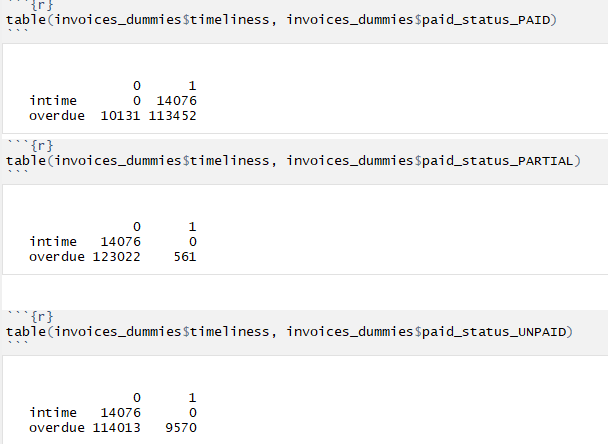

In [32]:
from IPython.display import Image
Image("unbalanced.png")

In [33]:
prediction = data_full.drop(['timeafter', 'timeliness_overdue'], axis = 1)
prediction = prediction.query('paid_status_PAID == 1')
prediction = prediction.drop(['paid_status_PAID'], axis = 1)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(prediction.drop(['timeliness_intime'], axis = 1), 
                                                   prediction['timeliness_intime'], test_size = 0.3, random_state = 1)

In [35]:
X_train.head()

,total,paid,created_at_year,created_at_month,created_at_day,created_at_hour,created_at_minute,created_at_second,due_year,due_month,due_day,due_hour,due_minute,due_second,score
119560,648.0,648.0,2016,2,7,11,15,13,2016,2,9,0,0,0,57
120281,240.0,240.0,2016,5,15,15,29,15,2016,5,9,0,0,0,13
134696,0.0,0.0,2017,1,9,12,39,54,2017,1,9,0,0,0,14
40549,650.0,650.0,2016,7,14,10,50,52,2016,7,9,0,0,0,27
128340,5345.0,5345.0,2016,10,10,10,2,56,2016,10,9,0,0,0,19


In [36]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(89269, 15) (89269,)
(38259, 15) (38259,)


In [37]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
LR = LogisticRegression()
LR.fit(X_train, y_train)
pred = LR.predict(X_test)
print('Accuracy on test data is %.5f'%accuracy_score(pred, y_test))

Accuracy on test data is 0.89456


In [38]:
from collections import Counter
print(Counter(pred))
print(Counter(y_test))

Counter({0: 38052, 1: 207})
Counter({0: 34086, 1: 4173})


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[34052,    34],
       [ 4000,   173]], dtype=int64)

As we can notice only 2589 invoices from actual 4173 were predicted to be paid in time. 
Next step, we should predict when the overdue invoices will be paid. For this task, the simplest way is to create regression model. But for this task (I think) I should take into accaunt only data 'PAID' and 'overdue'.

In [40]:
overdue = data_full.query('timeliness_overdue == 1 & paid_status_PAID == 1')

In [41]:
overdue.shape

(113452, 19)

In [42]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
pred = LR.predict(X_test)

Next, we should evaluate obtained results. 

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)
#LR.score(X_test, y_test1)

0.11286561323481215

The R2 score is not equal 0, so model does not perform constant predictions. MAE and MSE also produce small values. Therefore, I can make the conclusion that model predict values that are not too different from real one.

In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.18656101570535977

In [45]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(pred, y_test))

0.29361166413541123